<a href="https://colab.research.google.com/github/jcandane/StochasticPhysics/blob/main/delaunay_poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

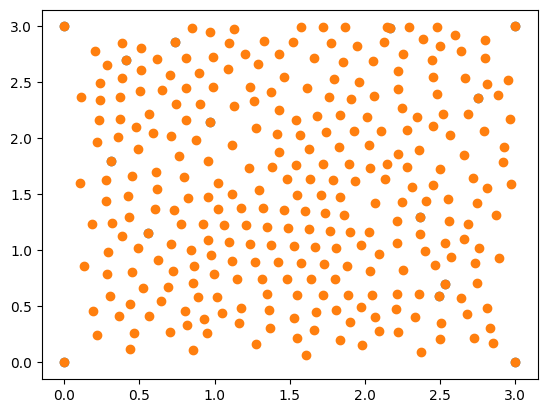

(296, 2)


In [1]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.datasets import face ## raccoon face
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

np.random.seed(seed=71)

## get points
a = 3
bounds = np.array([[0,0.],[1.,0],[0.,1.],[1.,1]])*a
R_min  = 0.125
R_ix   = np.concatenate([a*np.random.rand(10,2), bounds])
plt.scatter(R_ix[:,0], R_ix[:,1]) ### plot
Λ_i    = R_min*np.ones(R_ix.shape[0]) ### variable R_min (cutoff) if desired

for i in range(12): ### for-loop over generations, e.g. 12 generations
    A    = Delaunay( R_ix ).simplices ## get all triangles in terms of vertices
    P_Ix = np.sum( R_ix[ A, : ] , axis=1 )/(R_ix.shape[1]+1) ## find center-of-mass for every triangle
    m_I  = np.all( np.linalg.norm( R_ix[ A, : ] - P_Ix[:,None,:], axis=2) > Λ_i[A] , axis=1) ## if ALL True, along i, then make take point i

    P_Ix = P_Ix[m_I,:] ### only take "True" candidates

    R_ix = np.concatenate((R_ix, P_Ix)) ### append these candidates to the active-list
    Λ_i  = np.concatenate((Λ_i, R_min*np.ones(P_Ix.shape[0])))

plt.scatter(R_ix[:,0], R_ix[:,1]) ### plot
plt.show()
print(R_ix.shape)

## get image and interpolation of this image

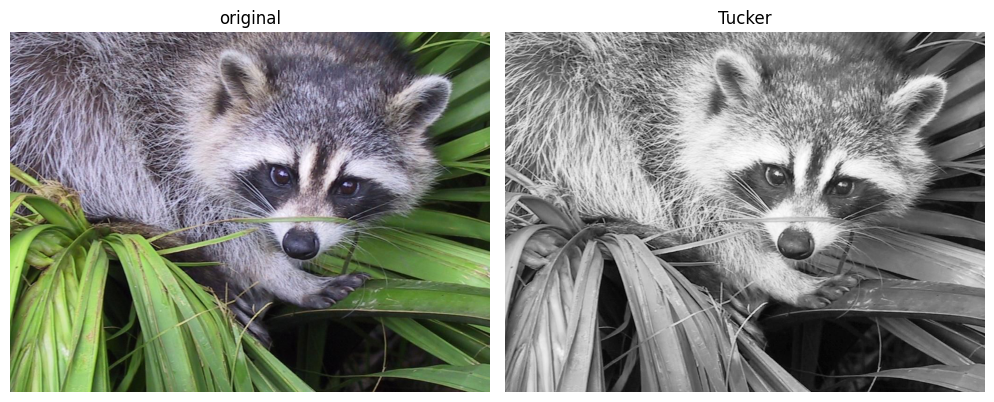

In [2]:
black_n_white = np.asarray([ np.abs(np.sum(face(), axis=-1)/3 - 254)]).swapaxes(1,2).swapaxes(0,2)

# Plotting the original and reconstruction from the decompositions
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 3, 1)
ax.set_axis_off()
ax.imshow(face())
ax.set_title('original')

ax = fig.add_subplot(1, 3, 2)
ax.set_axis_off()
#ax.imshow(to_image( np.linalg.norm( face() , axis=-1) ))
ax.imshow(black_n_white, cmap='Greys')
ax.set_title('Tucker')

plt.tight_layout()
#plt.savefig("raccoon.png", dpi=800)
plt.show()

dims = np.asarray(black_n_white.shape[:2])/1000

In [3]:
rac_x = np.arange(black_n_white.shape[0])/1000
rac_y = np.arange(black_n_white.shape[1])/1000
inter = RegularGridInterpolator((rac_x,rac_y), black_n_white[:,:,0])

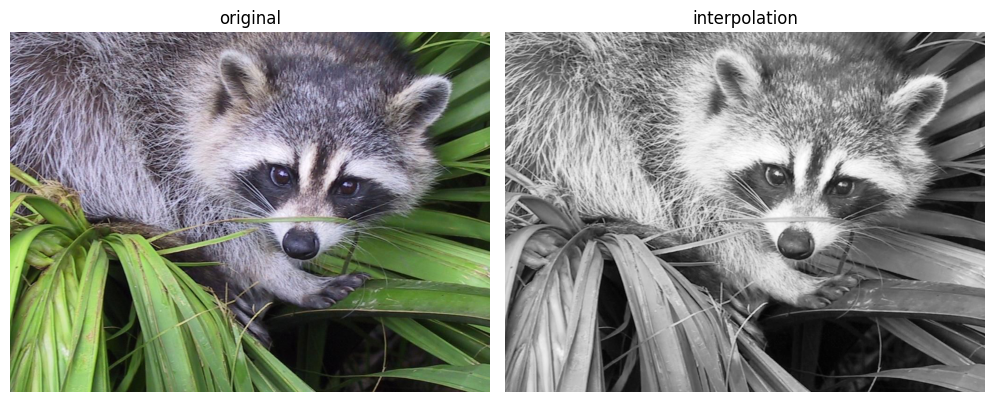

In [4]:
### example replotting the image using interpolation from the original

xy = np.asarray([np.meshgrid( rac_x[:-1]+rac_x[1]/2, rac_y[:-1]+rac_y[1]/2, indexing='ij')])[0]
xy = xy.reshape((2,np.prod(xy.shape[1:]))).T

# Plotting the original and reconstruction from the decompositions
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 3, 1)
ax.set_axis_off()
ax.imshow(face())
ax.set_title('original')

ax = fig.add_subplot(1, 3, 2)
ax.set_axis_off()
#ax.imshow(to_image( np.linalg.norm( face() , axis=-1) ))
ax.imshow(inter(xy).reshape((black_n_white.shape[0]-1, black_n_white.shape[1]-1)), cmap='Greys')
ax.set_title('interpolation')

plt.tight_layout()
#plt.savefig("raccoon.png", dpi=800)
plt.show()

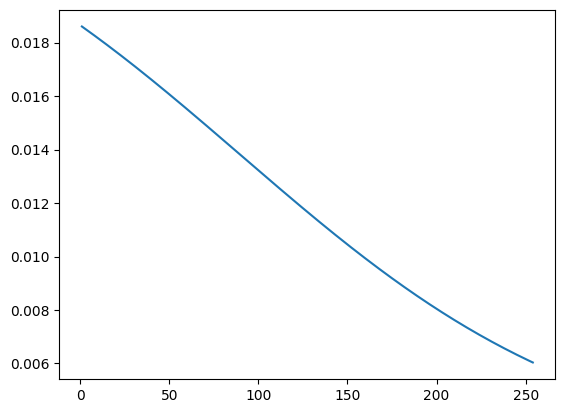

In [47]:
x = np.arange(1,255)

### this function controls the radius of the poisson-discs
def FermiDirac(x, kT=100, μ=90., R_min=0.023):
    return R_min / ( np.exp((x-μ) /kT) + 1) + 0.1*R_min

plt.plot(x, FermiDirac(x))
plt.show()

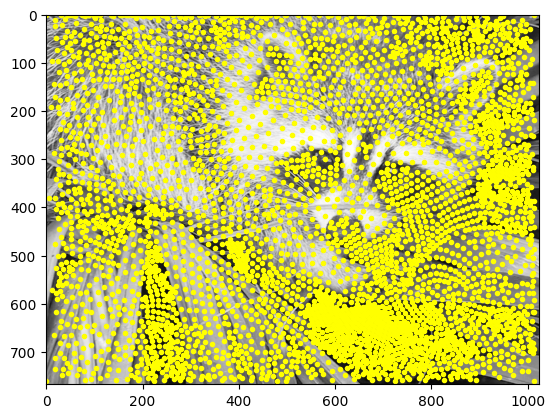

In [56]:
np.random.seed(seed=79)

## get points


bounds  = np.array([[0,0.],[0.99,0],[0.,0.99],[0.99,0.99]])
bounds *= dims[None,:]

R_ix    = np.concatenate([np.random.rand(10,2)*dims[None,:], bounds])
Λ_i     = FermiDirac(inter(R_ix)) ### variable R_min (cutoff) if desired

for i in range(12): ### for-loop over generations, e.g. 12 generations
    A    = Delaunay( R_ix ).simplices ## get all triangles in terms of vertices
    P_Ix = np.sum( R_ix[ A, : ] , axis=1 )/(R_ix.shape[1]+1) ## find center-of-mass for every triangle
    m_I  = np.all( np.linalg.norm( R_ix[ A, : ] - P_Ix[:,None,:], axis=2) > Λ_i[A] , axis=1) ## if ALL True, along i, then make take point i

    P_Ix = P_Ix[m_I,:] ### only take "True" candidates

    R_ix = np.concatenate((R_ix, P_Ix)) ### append these candidates to the active-list
    Λ_i  = np.concatenate((Λ_i, FermiDirac(inter(P_Ix))))

implot = plt.imshow(black_n_white,cmap='Greys')
# put a red dot, size 40, at 2 locations:
plt.scatter(R_ix[:,1]*1000, R_ix[:,0]*1000, color="yellow", marker=".")

plt.show()